In [1]:
!pip install plotly_express

In [2]:
import pandas as pd

titanic = pd.read_excel('../ML/data/titanic.xls')


In [3]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
titanic['survived'].value_counts()
# value_counts() : 각 값의 숫자를 세는 메써드

survived
0    809
1    500
Name: count, dtype: int64

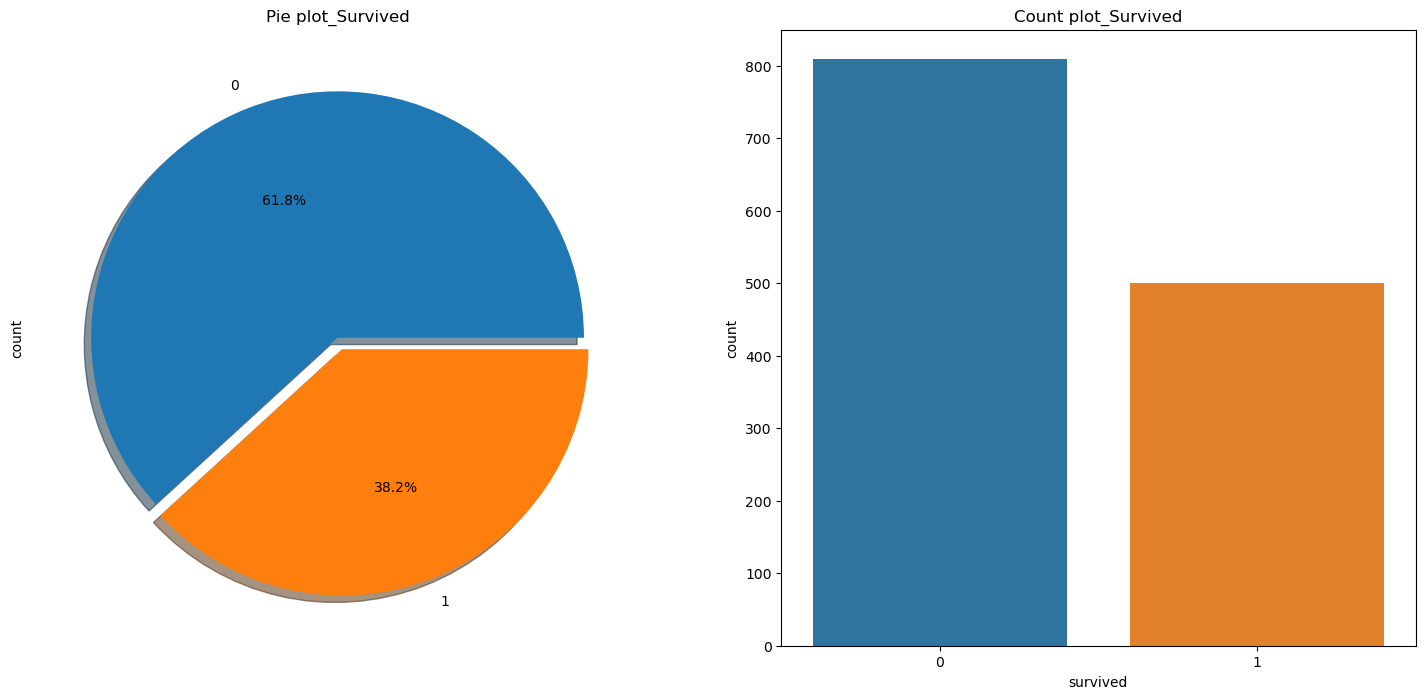

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# f : fig(그림), ax : axis(열) 변수로 subplots에서 반환
f, ax = plt.subplots(1, 2, figsize = (18, 8))
            # subplots(?, ?) : 한 그림판에 ?행, ?열의 그림을 넣겠다

titanic['survived'].value_counts().plot.pie(explode = [0, 0.05],
                                            # explode = [?, ?] : 파이 조각들을 경계선으로 떨어트려라 
                                            # ? : 각각의 조각들이 얼만큼 떨어질건지의 거리 설정  
                                            autopct = '%1.1f%%',
                                            # autopct = : 파이 면적 안에 숫자(비율)를 입력해줘라 
                                            ax=ax[0], 
                                            # ax[0] : 0번째 열에 그리겠다
                                            shadow = True)
                                            # shadow = True : 파이그래프에 약간의 음영을 넣어줘라

ax[0].set_title('Pie plot_Survived')
ax[0].set_label('')

sns.countplot(x='survived', data=titanic, ax=ax[1])
ax[1].set_title('Count plot_Survived')

plt.show()

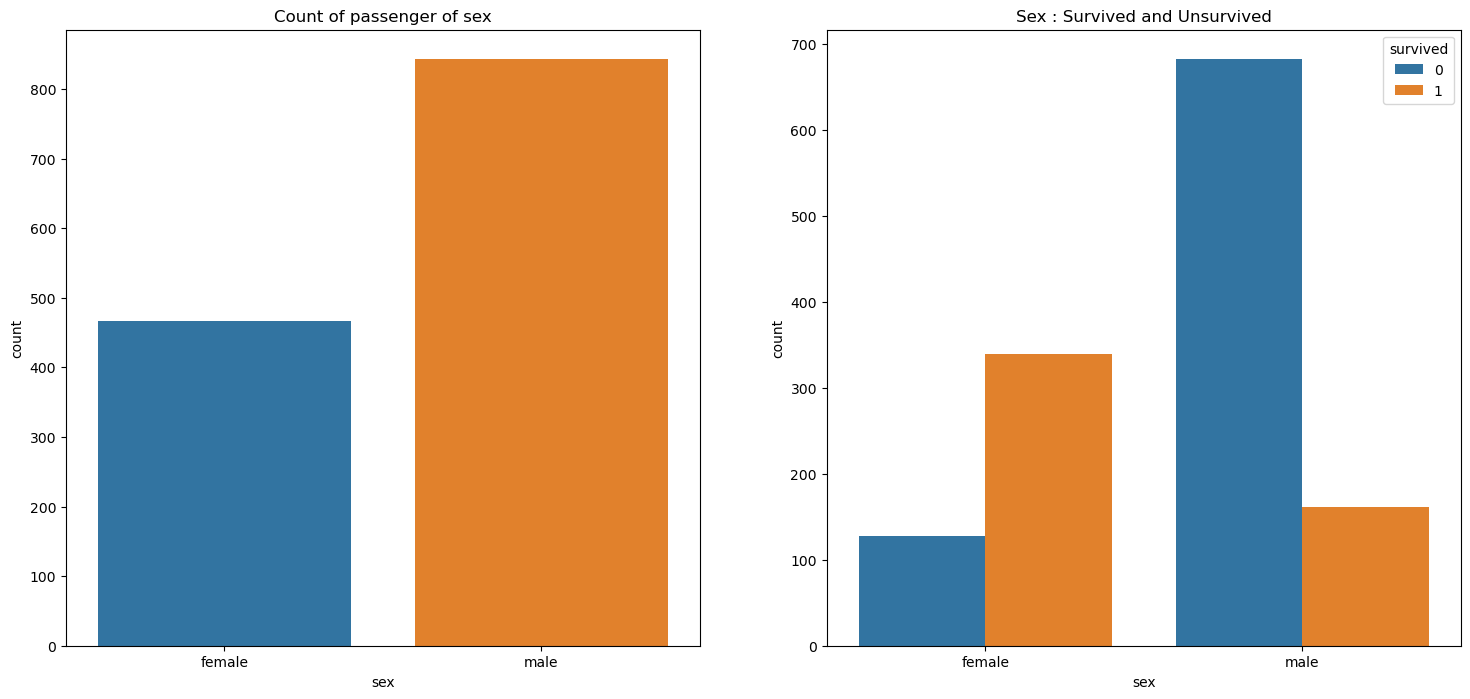

In [6]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

sns.countplot(x='sex', data=titanic, ax=ax[0])
ax[0].set_title('Count of passenger of sex')
ax[0].set_label('')

sns.countplot(x='sex', hue='survived', data=titanic, ax=ax[1])
ax[1].set_title('Sex : Survived and Unsurvived')

plt.show()

In [7]:
pd.crosstab(titanic['pclass'], titanic['survived'], margins=True)
# crosstab : titanic['survived'] 종류별로 나누어 컬럼 설정 후 설정된 컬럼에 따라 titanic['pclass'] 인덱스 지정
# margins=True : 마지막에 합계 설정

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


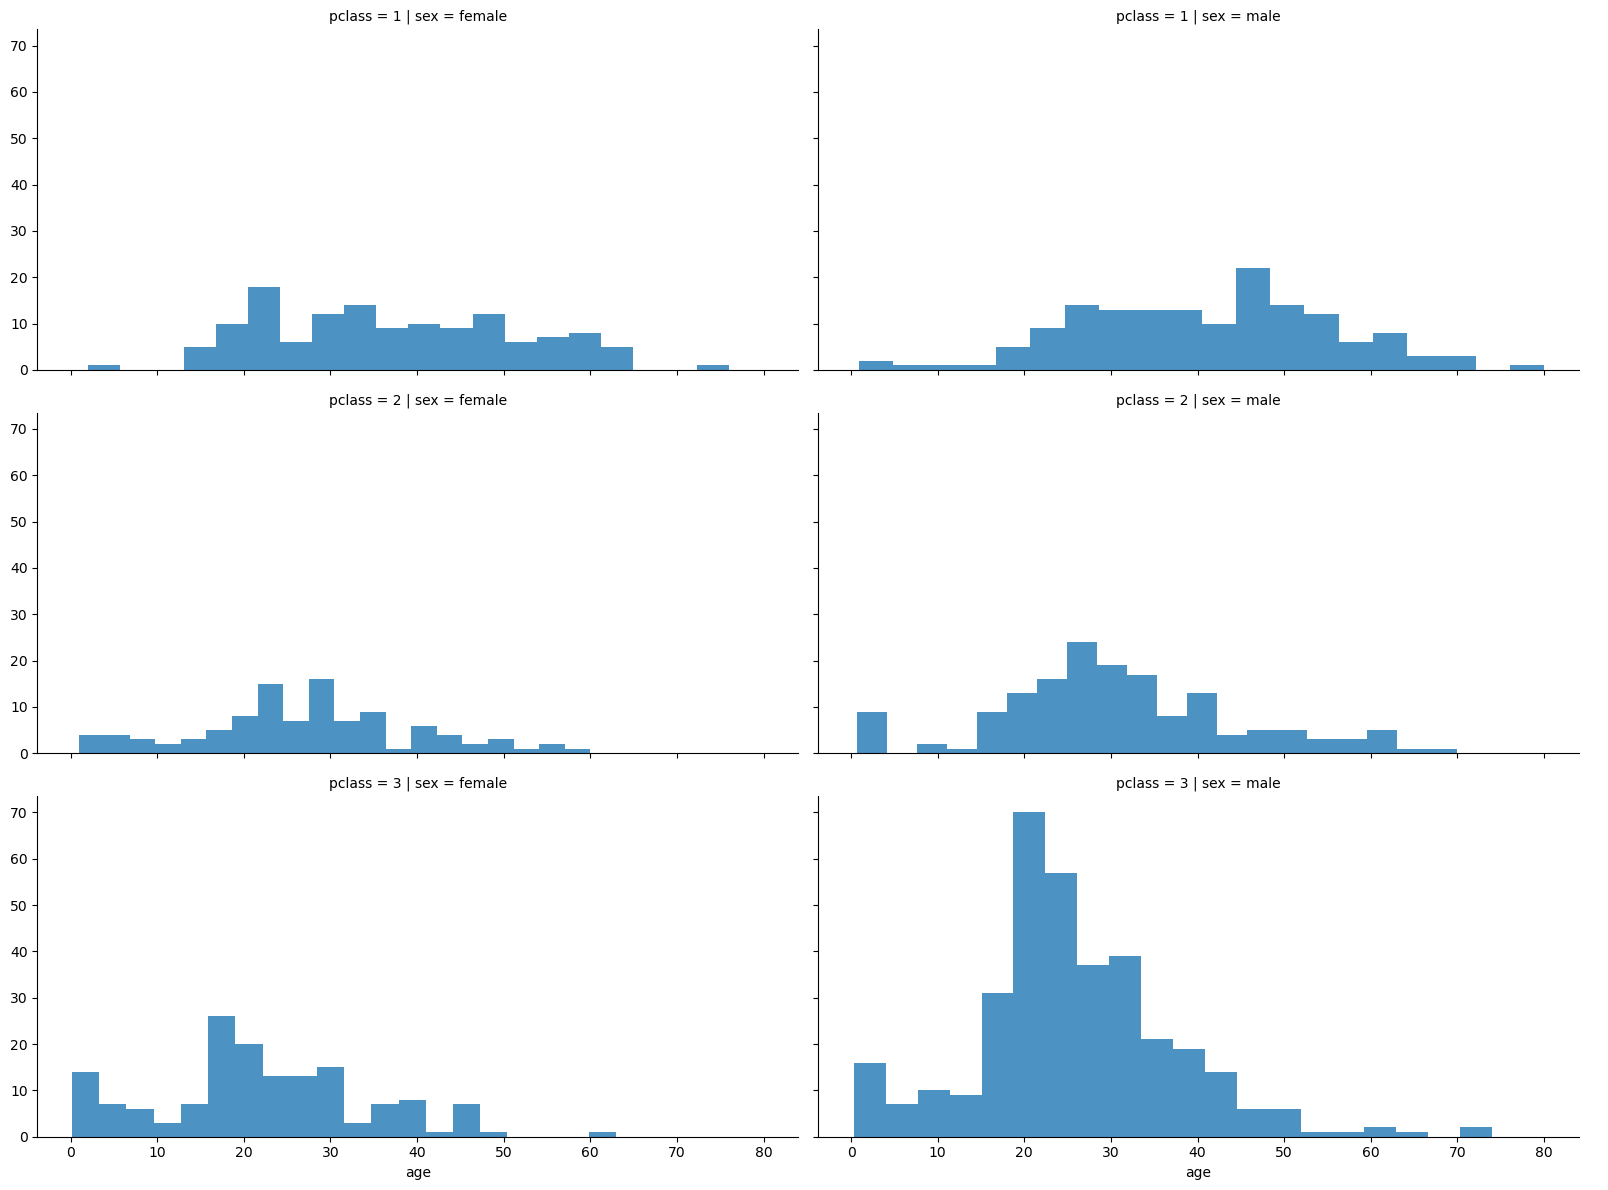

In [8]:
grid = sns.FacetGrid(titanic, row='pclass', col='sex', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha = 0.8, bins = 20)
grid.add_legend()

In [9]:
import plotly.express as px

fig = px.histogram(titanic, x='age')
fig.show()

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



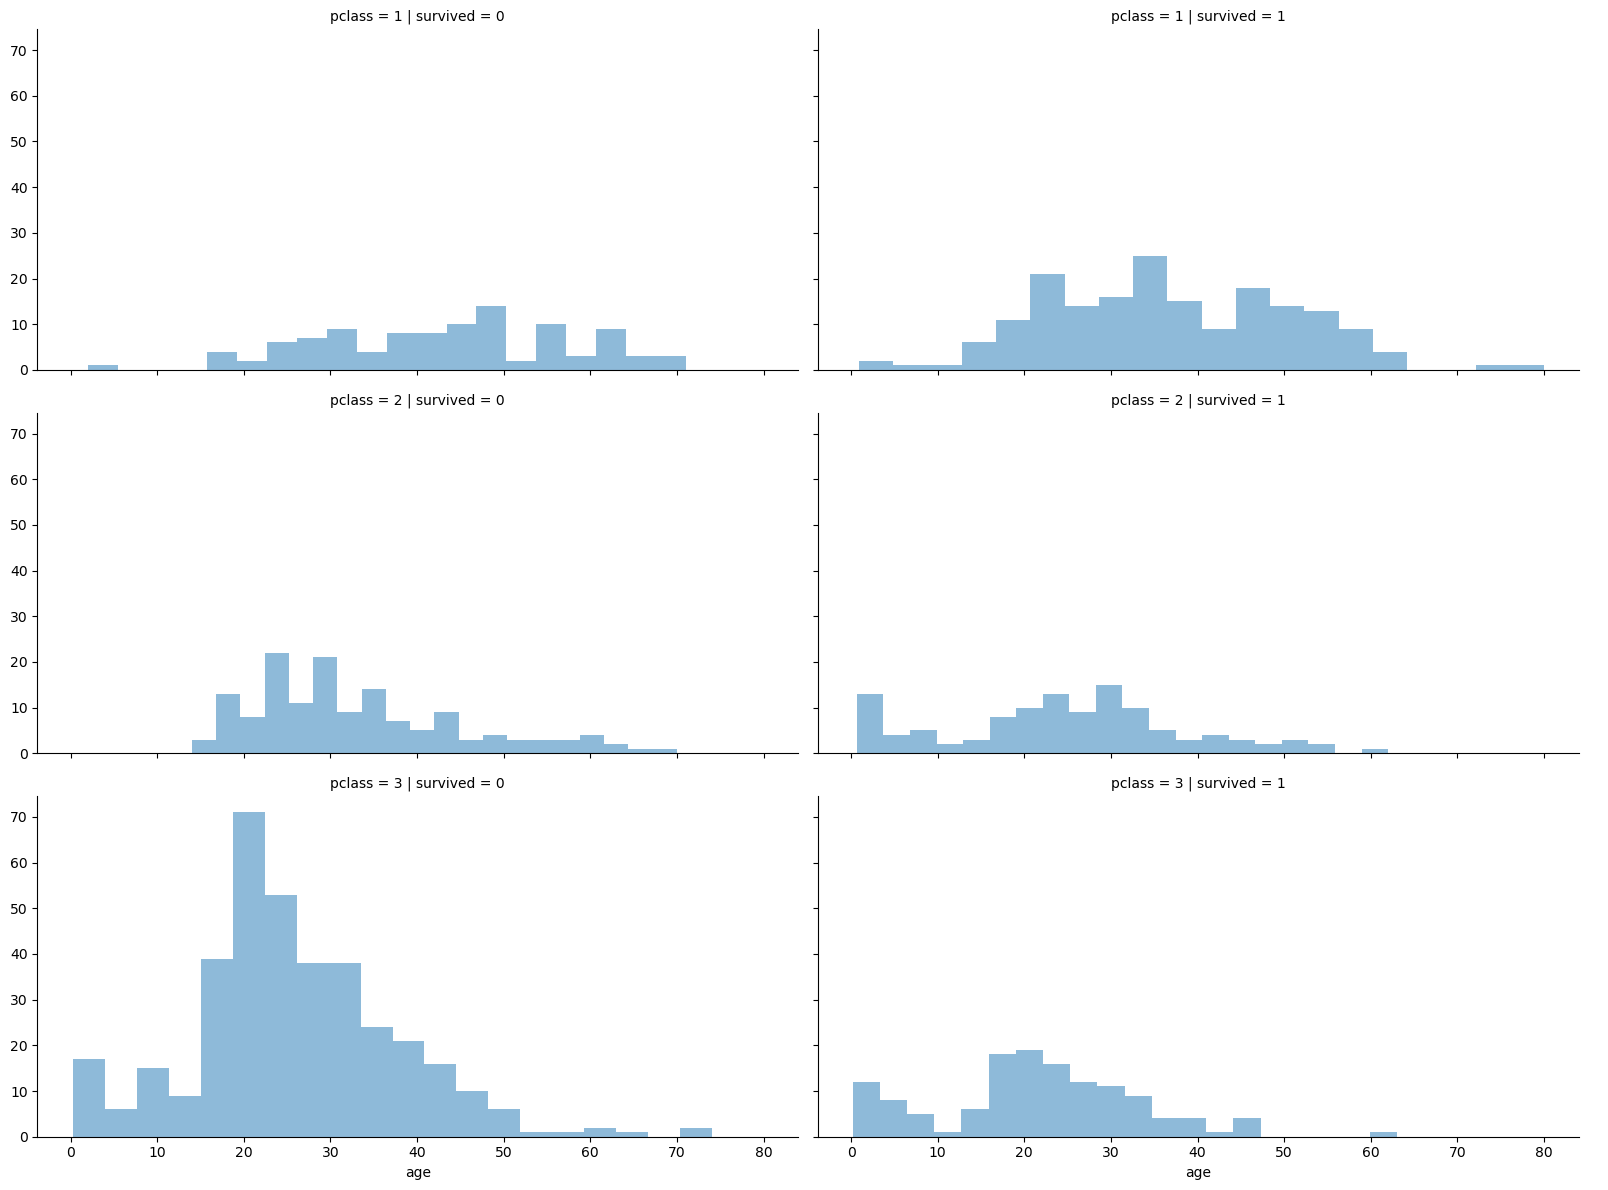

In [10]:
grid = sns.FacetGrid(titanic, col='survived', row='pclass', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha = 0.5, bins = 20)
grid.add_legend()

In [11]:
# pd.cut : 'bins = []'로 데이터를 나눌 범위를 설정한 후 'labels = []'의 형태로 어떤 컬럼에서 값들을 지정

titanic['age_cat'] = pd.cut(titanic['age'], bins=[0, 7, 15, 30, 60, 100],
                          include_lowest=True,
                          labels=['baby', 'teen', 'young', 'adult', 'old'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


<Axes: xlabel='sex', ylabel='survived'>

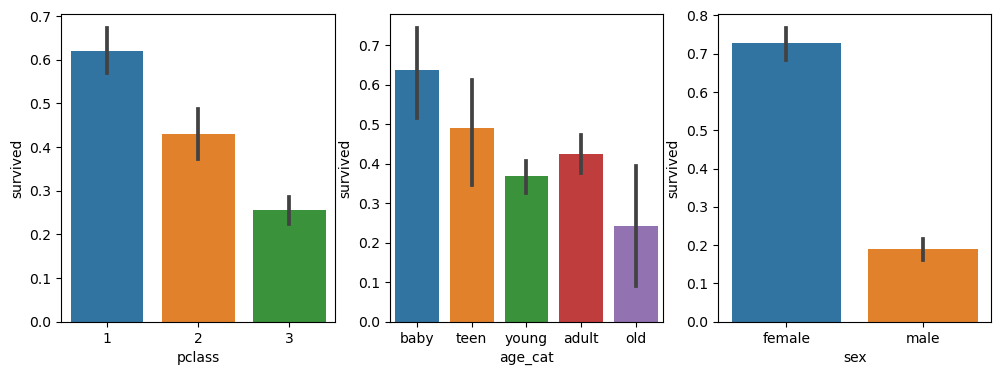

In [23]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.barplot(x='pclass', y='survived', data=titanic)
plt.subplot(132)
sns.barplot(x='age_cat', y='survived', data=titanic)
plt.subplot(133)
sns.barplot(x='sex', y='survived', data=titanic)
# plt.subplots_adjust(top=1, bottom=0.1, left=0.1, right=0.1, hspace=0.5, wspace=0.5)

In [35]:
import re

for idx, dataset in titanic.iterrows():
    tmp = dataset['name']
    print(re.search('\,\s\w+(\s\w+)?\.', tmp).group())
    # \, (콤마로 시직을하고), \s(한 칸을 비우고), \w+(많은 글자들이 나오다가), 
    # (\s\w+)? (다시 한칸을 비우고 많은 글자가 나오다가 여러 단어가 추가로 나오다가), \. (점으로 끝나는) 

, Miss.
, Master.
, Miss.
, Mr.
, Mrs.
, Mr.
, Miss.
, Mr.
, Mrs.
, Mr.
, Col.
, Mrs.
, Mme.
, Miss.
, Mr.
, Mr.
, Mr.
, Mrs.
, Miss.
, Mr.
, Mr.
, Mrs.
, Mr.
, Miss.
, Miss.
, Mr.
, Mr.
, Mrs.
, Miss.
, Mr.
, Mr.
, Mr.
, Miss.
, Miss.
, Mr.
, Miss.
, Miss.
, Mr.
, Mr.
, Mr.
, Dr.
, Mrs.
, Mrs.
, Mrs.
, Miss.
, Major.
, Mr.
, Mr.
, Mrs.
, Mr.
, Mrs.
, Mr.
, Mr.
, Mr.
, Master.
, Miss.
, Mr.
, Mrs.
, Mr.
, Mrs.
, Mr.
, Mrs.
, Mr.
, Mrs.
, Mr.
, Mrs.
, Miss.
, Miss.
, Mr.
, Mrs.
, Mr.
, Mr.
, Mrs.
, Miss.
, Mr.
, Mr.
, Miss.
, Mr.
, Mrs.
, Mrs.
, Mr.
, Capt.
, Miss.
, Mrs.
, Mr.
, Mrs.
, Mr.
, Mr.
, Miss.
, Mr.
, Mrs.
, Mr.
, Mrs.
, Dr.
, Master.
, Mrs.
, Mr.
, Mrs.
, Mrs.
, Lady.
, Sir.
, Mr.
, Mrs.
, Miss.
, Miss.
, Miss.
, Mr.
, Mrs.
, Miss.
, Mr.
, Mr.
, Miss.
, Miss.
, Miss.
, Mr.
, Mr.
, Mrs.
, Miss.
, Mr.
, Dr.
, Mr.
, Mrs.
, Miss.
, Mr.
, Mrs.
, Mr.
, Mr.
, Mrs.
, Mr.
, Miss.
, Miss.
, Mrs.
, Mr.
, Mr.
, Mrs.
, Mr.
, Col.
, Miss.
, Mr.
, Mrs.
, Mr.
, Mrs.
, Mr.
, Mr.
, Mrs.
, Mr.

In [36]:
import re

title = []

for idx, dataset in titanic.iterrows():
    title.append(re.search('\,\s\w+(\s\w+)?\.', dataset['name']).group()[2:-1])

titanic['title'] = title
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [37]:
pd.crosstab(titanic['title'], titanic['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [39]:
titanic['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [40]:
# 사회적 신분 정리

titanic['title'] = titanic['title'].replace('Ms', 'Miss') # .replace(현재단어, 바꿀단어)
titanic['title'] = titanic['title'].replace('Mlle', 'Miss')
titanic['title'] = titanic['title'].replace('Mme', 'Mrs')

Rare_f = ['Dona', 'Dr', 'Lady', 'the Countess']
Rare_m = ['Capt', 'Col', 'Don', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Master']

for i in Rare_f:
    titanic['title'] = titanic['title'].replace(i, 'Rare_f')

for i in Rare_m:
    titanic['title'] = titanic['title'].replace(i, 'Rare_m')

titanic['title'].unique()


array(['Miss', 'Rare_m', 'Mr', 'Mrs', 'Rare_f'], dtype=object)

##### 사회적 신분에 따른 생존율
- Mr(평민남성) -> Rare_m(귀족남성) -> Rare_f(귀족여성) -> Miss(평민여성) -> Mrs(평민기혼여성)

In [43]:
titanic[['title', 'survived']].groupby(['title'], as_index=False).mean()

# .groupby([컬럼], as_index=False).agg
# .groupby()에서 정의한 컬럼 조건에 따라 데이터 혹은 데이터프레임을 각각의 그룹으로 나눈 후 
# 각 그룹에 통계함수를 적용하여 다시 하나의 테이블로 합쳐주는 메써드
# as_index= : 그룹화할 내용을 인덱스로 지정할지 여부입니다. False이면 기존 인덱스가 유지됩니다.
# agg(=통계함수) : (ex. mean(평균), sum(합계)..)

,title,survived
0,Miss,0.678030
1,Mr,0.162483
2,Mrs,0.787879
3,Rare_f,0.636364
4,Rare_m,0.443038


In [44]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
 15  title      1309 non-null   object  
dtypes: category(1), float64(3), int64(4), object(8)
memory usage: 155.0+ KB


In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic['sex'])
titanic['gender'] = le.transform(titanic['sex'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare_m,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs,0


In [47]:
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
age_cat       263
title           0
gender          0
dtype: int64

In [48]:
titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]

titanic.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin        773
embarked       2
boat         628
body         926
home.dest    360
age_cat        0
title          0
gender         0
dtype: int64

<Axes: >

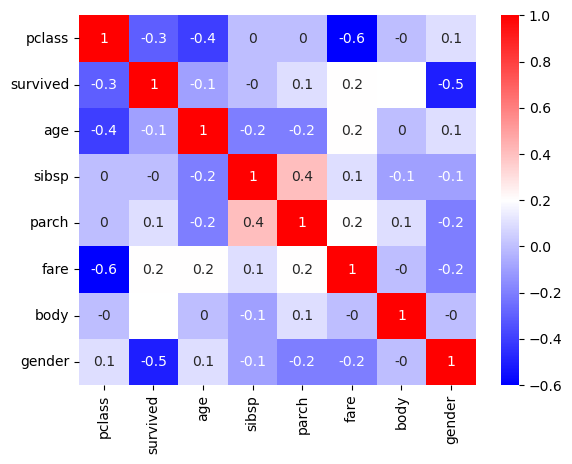

In [53]:
correlation_matrix = titanic.corr(numeric_only=True).round(1)
# df.corr() : df의 상관관계를 보겠다는 메써드, numeric_only=True : 오직 숫자데이터들만의 상관계수를 보겠다는 설정
sns.heatmap(data = correlation_matrix, annot=True, cmap='bwr')

In [54]:
from sklearn.model_selection import train_test_split

# [['pclass', 'age', 'sibsp(함께 탑승한 형제 또는 배우자 수)', 
# 'parch'(함께 탑승한 부모 또는 자녀 수), 'fare(티켓비용)', 'gender']]

X = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']]
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=4, random_state=13)
dt.fit(X_train, y_train)

pred = dt.predict(X_test)
print(accuracy_score(y_test, pred))

0.7655502392344498


In [61]:
import numpy as np

dicaprio = np.array([[3, 18, 0, 0, 5, 1]])
print('Dicaprio : ', dt.predict_proba(dicaprio)[0, 1])
# dt.predict_proba(dicaprio) 값출력시 리스트 안의 리스트로 [[0.83271375 0.16728625]] 값을 반환하기 때문에
# 리스트 형태로 [0, 1]을 설정하여 survived 항목 중 1인 생존확률 값을 출력한다고 설정

Dicaprio :  0.16728624535315986


c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [62]:
winslet = np.array([[1, 16, 1, 1, 100, 0]])
print('Winslet : ', dt.predict_proba(winslet)[0, 1])

Winslet :  1.0


c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

